# Kaggle Project

## Describe Your Dataset

**URL:** https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

**Task:**

Binary classification

**Abstract:**

심혈관질환(CVD)은 전 세계적으로 사망률 1위인 질병으로, 매년 약 1790만 명이 사망하는데, 이는 전체 사망자의 31%를 차지한다. 심부전은 CVD에 의해 야기되는 일반적인 사건이며 이 데이터 집합에는 심부전에 의한 사망률을 예측하는 데 사용할 수 있는 12가지 Feature가 포함되어 있다. 본 프로젝트에서는 총 다섯 가지의 모델을 사용하여 사망 여부를 예측하고, 어떠한 요인이 큰 영향을 끼치는지 조기 발견을 하여 질병을 사전에 관리 또는 예방할 수 있도록 하는 것이 목표이다.

**Datasets** 

총 데이터 수: 299개

Train:Val:Test= 8:2:2

* Train dataset: 179개

* Validation dataset: 60개

* Test dataset: 60개

**Features(x):** 

(총 12개)

age: 환자의 나이 (years)

anaemia(빈혈): 적혈구나 헤모글로빈의 감소 상태 (boolean)

high blood pressure(고혈압): 고혈압 유무 (boolean)

creatinine phosphokinase (CPK, 크레아티닌 인산화효소): 혈중 CPK 효소 수치 (mcg/L)

diabetes(당뇨): 당뇨 여부 (boolean)

ejection fraction(박출률): 심장의 펌프 기능을 나타내는 지표 (percentage)

platelets(혈소판): 혈중 혈소판량 (kiloplatelets/mL)

sex(성별): 여자/남자 (binary)

serum creatinine(혈청 크레아티닌): 혈중 혈청 크레아티닌 수치 (mg/dL)

serum sodium(나트륨-혈청): 혈중 혈청 나트륨 수치 (mEq/L)

smoking(흡연): 흡연 여부 (boolean)

time: 사후관리(follow-up) 기간 (days)

**Target(y):**

death event: 환자가 follow-up 기간 중 사망한 경우 (boolean)

---

## Build Your Model

### Data preprocessing

In [142]:
import numpy as np
import pandas as pd
import warnings

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  StandardScaler

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix

# Model Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [143]:
warnings.filterwarnings(action='ignore')

In [144]:
#데이터셋 불러오기
data = pd.read_csv("./heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [145]:
data.shape

(299, 13)

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [147]:
#target variable 개수 세기
data["DEATH_EVENT"].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

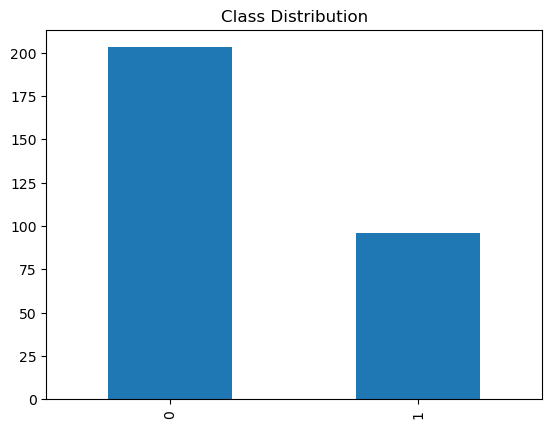

In [148]:
#Class Imbalance (class 0: 68%, class 1: 32%)
data["DEATH_EVENT"].value_counts().plot(kind="bar")
plt.title("Class Distribution");

Data Scaling

* 각 feature간의 값의 범위가 차이가 있기 때문에 하나의 기준을 따를 수 있도록 스케일링 시행

* 평균을 제거(평균: 0)하고 데이터를 단위 분산(분산: 1)으로 조정해 주는 StandardScaler 사용

In [149]:
x = data.drop(['DEATH_EVENT'], axis = 1)
y = data['DEATH_EVENT']
scaler = StandardScaler()
X = scaler.fit_transform(x)

df = pd.DataFrame(X, columns = x.columns.values.tolist())
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.871105,-0.537688,1.179830,-0.007077,1.359272,-1.109765e+00,-0.284552,1.447094,0.735688,1.454161,1.803451
295,-0.491279,-0.871105,1.278215,-0.847579,-0.007077,-0.735688,6.802472e-02,-0.187726,0.539054,-1.359272,-0.687682,1.816357
296,-1.333392,-0.871105,1.525979,1.179830,1.854958,-0.735688,4.902082e+00,-0.575031,0.312044,-1.359272,-0.687682,1.906697
297,-1.333392,-0.871105,1.890398,-0.847579,-0.007077,-0.735688,-1.263389e+00,0.005926,0.766064,0.735688,1.454161,1.932509


Data Split
* Train:Val:Test = 8:2:2

In [150]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=20)
X_tr, X_val, y_tr, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=20)

### Model Construction

* 각 모델별 하이퍼 파라미터 튜닝을 위해 GridSearchCV 사용
* GridSearchCV: Cross-Validation을 기반으로 하이퍼 파라미터를 순차적으로 측정하며, 가장 좋은 파라미터를 알려 줌

Logistic Regression

In [151]:
model_lr = LogisticRegression()

Decision Tree

In [152]:
model_dt = DecisionTreeClassifier()

grid = {'min_samples_split': [5, 10, 20, 50, 100],
       'max_depth': [5, 10, 15, 20]}

model_dt = GridSearchCV(model_dt, grid, cv=5)

SVC

In [153]:
model_svc = SVC()

grid = {'kernel': ['linear','rbf','poly']}

model_svc = GridSearchCV(model_svc, grid, cv=5)

kNN

In [154]:
model_knn = KNeighborsClassifier() 

grid = {"n_neighbors":np.arange(1,30)}

model_knn = GridSearchCV(model_knn, grid, cv=5)

Random Forest

In [155]:
model_rf = RandomForestClassifier()

grid = {'n_estimators':[100,200,300,400,500], 'max_depth': [2, 5, 10]}

model_rf = GridSearchCV(model_rf, grid, cv=5)

### Train Model & Select Model

In [156]:
def accuracy(pre, y):
    return sum(pre==y)/len(y)

Logistic regression

In [157]:
model_lr.fit(X_tr, y_tr)

tr_pred_lr = model_lr.predict(X_tr)
val_pred_lr = model_lr.predict(X_val)

tr_acc_lr = accuracy_score(tr_pred_lr, y_tr)
val_acc_lr = accuracy_score(val_pred_lr, y_val)

print('Training Accuracy : ', tr_acc_lr)
print('Validation Accuracy : ', val_acc_lr)

Training Accuracy :  0.8547486033519553
Validation Accuracy :  0.8666666666666667


Decision Tree

In [158]:
model_dt.fit(X_tr, y_tr)

tr_pred_dt = model_dt.predict(X_tr)
val_pred_dt = model_dt.predict(X_val)

tr_acc_dt = accuracy_score(tr_pred_dt, y_tr)
val_acc_dt = accuracy_score(val_pred_dt, y_val)

print('Training Accuracy : ', tr_acc_dt)
print('Validation Accuracy : ', val_acc_dt)

Training Accuracy :  0.8547486033519553
Validation Accuracy :  0.8333333333333334


In [159]:
model_dt.best_params_

{'max_depth': 5, 'min_samples_split': 50}

SVC

In [160]:
model_svc.fit(X_tr, y_tr)

tr_pred_svc = model_svc.predict(X_tr)
val_pred_svc = model_svc.predict(X_val)

tr_acc_svc = accuracy_score(tr_pred_svc, y_tr)
val_acc_svc = accuracy_score(val_pred_svc, y_val)

print('Training Accuracy : ', tr_acc_svc)
print('Validation Accuracy : ', val_acc_svc)

Training Accuracy :  0.9106145251396648
Validation Accuracy :  0.8666666666666667


In [161]:
model_svc.best_params_

{'kernel': 'rbf'}

kNN

In [162]:
model_knn.fit(X_tr, y_tr)

tr_pred_knn = model_knn.predict(X_tr)
val_pred_knn = model_knn.predict(X_val)

tr_acc_knn = accuracy_score(tr_pred_knn, y_tr)
val_acc_knn = accuracy_score(val_pred_knn, y_val)

print('Training Accuracy : ', tr_acc_knn)
print('Validation Accuracy : ', val_acc_knn)

Training Accuracy :  0.7877094972067039
Validation Accuracy :  0.7166666666666667


In [163]:
model_knn.best_params_

{'n_neighbors': 9}

Random Forest

In [164]:
model_rf.fit(X_tr, y_tr)

tr_pred_rf = model_rf.predict(X_tr)
val_pred_rf = model_rf.predict(X_val)

tr_acc_rf = accuracy_score(tr_pred_rf, y_tr)
val_acc_rf = accuracy_score(val_pred_rf, y_val)

print('Training Accuracy : ', tr_acc_rf)
print('Validation Accuracy : ', val_acc_rf)

Training Accuracy :  1.0
Validation Accuracy :  0.8833333333333333


In [165]:
model_rf.best_params_

{'max_depth': 10, 'n_estimators': 400}

In [166]:
#모델별 accuracy 평가
data_dic = {'Logistic Regression': [tr_acc_lr, val_acc_lr], 'KNN': [tr_acc_knn, val_acc_knn], 'Decision Tree': [tr_acc_dt, val_acc_dt], 'Random Forest': [tr_acc_rf, val_acc_rf], 'SVC': [tr_acc_svc, val_acc_svc]}
df_acc = pd.DataFrame.from_dict(data_dic, orient = 'index', columns = ['Train Accuracy', 'Validation Accuracy'])
df_acc.style.highlight_max(axis=0)

,Train Accuracy,Validation Accuracy
Logistic Regression,0.854749,0.866667
KNN,0.787709,0.716667
Decision Tree,0.854749,0.833333
Random Forest,1.000000,0.883333
SVC,0.910615,0.866667


Train 및 Validation Accuracy는 Random Forest가 가장 높으므로, 최종 모델로 Random Forest를 선택함

---

## Performance

In [167]:
#Test data에 대한 accuracy 평가
te_pred_rf = model_rf.predict(X_te)
te_acc_rf = accuracy_score(te_pred_rf, y_te)
print('Test Accuracy of Random Forest : ', te_acc_rf)

Test Accuracy of Random Forest :  0.7666666666666667


Random Forest-Feature Importance

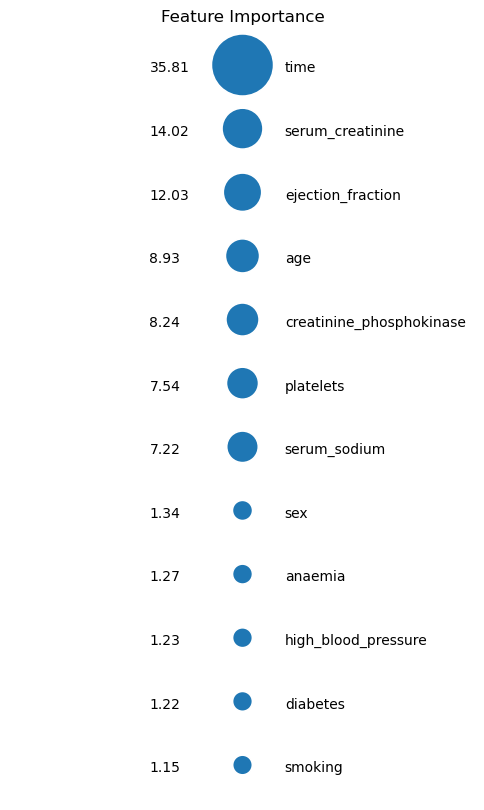

In [169]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

rf = RandomForestClassifier(n_estimators=400, max_depth=10,random_state=11)
rf.fit(X,y)
feat_imp = pd.DataFrame(rf.feature_importances_)
feat_imp.index = pd.Series(data.iloc[:,:-1].columns)
feat_imp = (feat_imp*100).copy().sort_values(by=0,ascending=False)
feat_imp = feat_imp.reset_index()
feat_imp.columns = ["Feature","Importance_score"]

fig = plt.figure(figsize=(6,10))
sns.scatterplot(data=feat_imp,x=5,y=np.linspace(100,0,12),size="Importance_score",sizes=(200,2000),legend=False)
for i,feat,imp in zip(np.linspace(100,0,12),feat_imp["Feature"],feat_imp["Importance_score"]):
    plt.text(x=5.05,y=i-1,s=feat)
    plt.text(x=4.89,y=i-1,s=np.round(imp,2))
plt.axis("off")
plt.title("Feature Importance")
plt.show()

The results explains

* Train 및 Validation Accuracy에서 best 퍼포먼스를 내는 Random Forest를 최종 모델로 선정하였으나, 실제 Test 결과에서는 Accuracy가 0.77 정도로 엄청난 성능을 보여주지는 못했다.


* 이는 데이터 분할의 영향일 수도 있다고 생각하고, 추후 연구로 변수와 상관계수가 높은 변수들만을 간추린 다음 모델을 학습시킨다면 더 robust한 모델이 될 것이라 생각한다.


* 또한 여러 가지 모델 중 가장 성능이 좋았던 RF를 활용하여 Feature importance를 분석해 보았을 때, 변수는 time, serum_creatinine, ejection_fracion임을 알 수 있다.


* 따라서 사후관리 기간이 길며, 혈중 혈청 나트륨 수치와 박출률이 높을수록 환자가 사후관리 기간 중 사망할 확률이 증가함을 결과로부터 도출해 낼 수 있다.


* 본 프로젝트에서 다양한 모델에 대해 직접 학습하고, 또 여러 가지 결과를 도출해 보며 Training과 Validation에서는 좋은 성능을 보여도 Test set에서는 때때로 좋지 않은 성능을 보일 수 있다는 것을 실감했던 것 같다.